In [1]:
# Imports
from utils import qr_householder, linear_regression

import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('fuel.csv')

# Create a new DataFrame with the transformed variables as required
new_data = pd.DataFrame()

new_data['Fuel'] = 1000 * data['FuelC'] / data['Pop']
new_data['Dlic'] = 1000 * data['Drivers'] / data['Pop']
new_data['Miles'] = np.log(data['Miles'])
new_data['Income'] = data['Income']
new_data = new_data[['Dlic', 'Miles', 'Income', 'Fuel']]

# A few representative data points
print(new_data.head())

# Extract data
X = new_data[['Dlic', 'Miles', 'Income']].values
y = new_data['Fuel'].values

          Dlic      Miles  Income        Fuel
0  1031.380067  11.455720   23471  690.264418
1  1031.641062   9.519882   30064  514.279223
2   908.597153  10.919533   25578  621.475071
3   946.570576  11.494069   22257  655.292668
4   844.703336  12.036298   32275  573.912855


           Intercept: 30.990719870922703
                 Tax: 0.4960592197198361
                Dlic: 27.753760298474976
              Income: -0.005951162459097643

                   R-squared: 0.4643


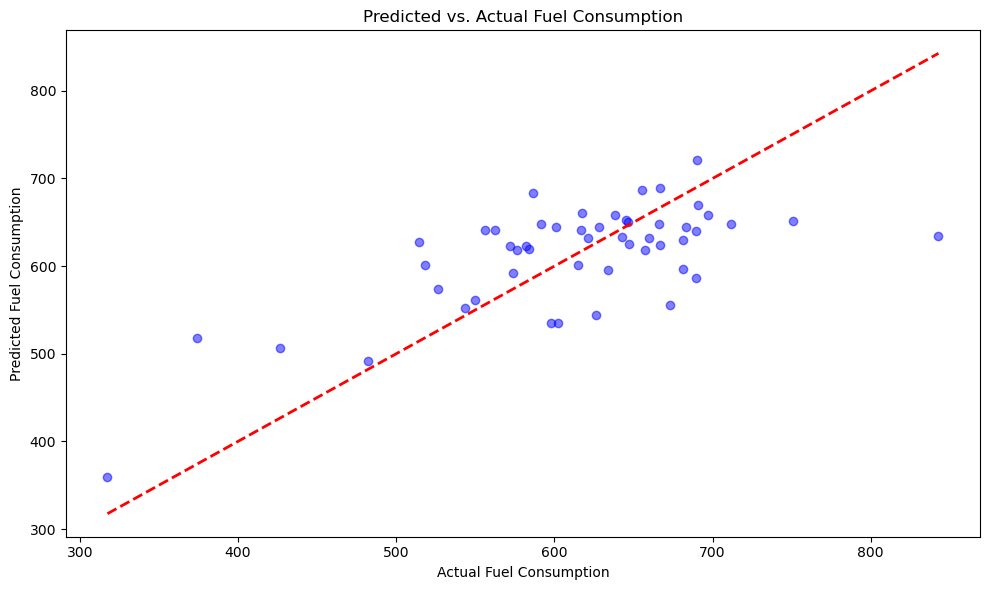

In [2]:
# Method 1: QR decomposition

w = linear_regression(X, y)  # Get result
w = w.ravel().tolist()  # Flatten the array into a list
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w))
for o in res:
    print("{: >20}: {: >10}".format(*o))


# Calculate predicted values
X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
y_pred = np.dot(X_with_intercept, w)

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f"\n{10*' '}{'R-squared: ':>20}{r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Predicted vs. Actual Fuel Consumption")
plt.tight_layout()
plt.show()

Coefficient of Determination (R-squared): 0.46432364249200886
Mean Squared Error (MSE): 4156.155961748325
Mean Absolute Error (MAE): 50.97619229046162


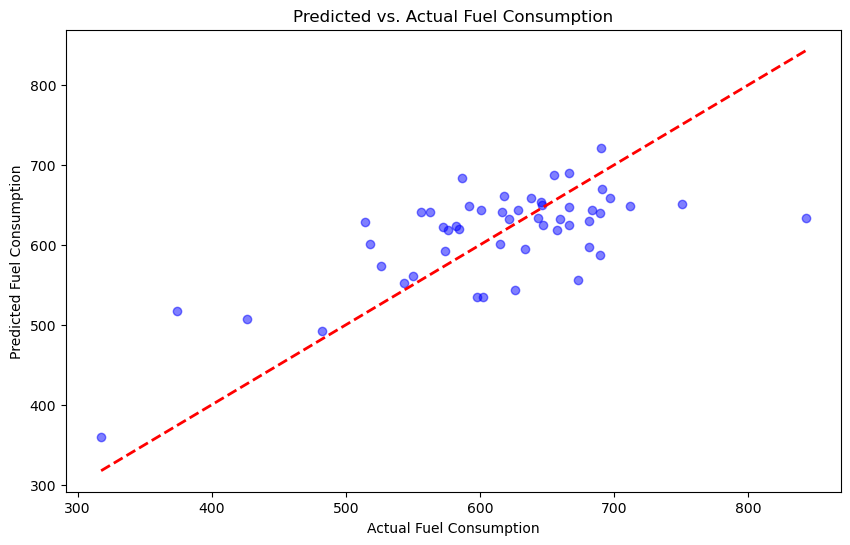

In [3]:
# Method 2: LinearRegression class from scikit-learn
regr = linear_model.LinearRegression(fit_intercept=True)
# fit_intercept = False for calculating the bias
regr.fit(X, y)

y_pred = regr.predict(X)
r2 = r2_score(y, y_pred)
print("Coefficient of Determination (R-squared):", r2)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', alpha = 0.5)
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.title('Predicted vs. Actual Fuel Consumption')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', lw=2)  # Reference line
plt.show()